![University of Tehran](./img/UT.png)
#   <font color='red'><center>AI CA 0<center></font> 
## <center>Dr. Yaghoubzade<center>
### <center>Daniyal Maroufi<center>
### <center>810098039<center>

# Aim

In this assignment, we are going to visualize a dataset of a bank. Then, using a simple classification model, predict if the customer opens a long-term account or not.

## Part 1

### Part 1.1

First, we read the dataset using pandas `read_csv` method.

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from time import time
df = pd.read_csv("bank_term_deposit.csv")
df

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no


### Part 1.2

To see the following statistical information of the columns that are not categorical, we used the `describe()` pandas method.

1. Mean
  
2. Standard deviation
  
3. Minimum
  
4. 25%, 50%, and 75% The percentiles to include in the output.
  
5. Maximum

In [3]:
df.describe()

,age,balance,duration,campaign,pdays
count,3984.000000,4164.000000,4388.000000,4521.000000,4521.000000
mean,41.617470,1136.750240,264.724020,2.793630,39.766645
std,10.696378,2726.204918,261.057119,3.109807,100.121124
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000
25%,32.000000,58.000000,104.000000,1.000000,-1.000000
50%,40.000000,316.000000,185.500000,2.000000,-1.000000
75%,49.000000,997.000000,331.000000,3.000000,-1.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000


### Part 1.3

To get 5 first rows of the dataframe:

In [17]:
df.head()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
0,30.0,unemployed,married,primary,1787.0,no,no,79.0,1,-1,unknown,no
1,33.0,services,married,secondary,4789.0,yes,yes,NaN,1,339,failure,no
2,NaN,management,single,tertiary,135.0,yes,no,185.0,1,330,failure,no
3,30.0,management,married,tertiary,1476.0,yes,yes,199.0,4,-1,unknown,no
4,59.0,blue-collar,married,secondary,NaN,yes,no,226.0,1,-1,unknown,no


### Part 1.4

To get 5 last rows of the dataframe

In [2]:
df.tail()

,age,job,marital,education,balance,housing,loan,duration,campaign,pdays,poutcome,y
4516,33.0,services,married,secondary,-333.0,yes,no,329.0,5,-1,unknown,no
4517,57.0,self-employed,married,tertiary,-3313.0,yes,yes,153.0,1,-1,unknown,no
4518,57.0,technician,married,secondary,295.0,no,no,151.0,11,-1,unknown,no
4519,28.0,blue-collar,married,secondary,1137.0,no,no,129.0,4,211,other,no
4520,44.0,entrepreneur,single,tertiary,1136.0,yes,yes,345.0,2,249,other,no


### Part 1.5

To get the type of each column using `info()` pandas method:

1. RangeIndex
2. Range of columns
3. Type of each column
4. Memory usage

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        3984 non-null   float64
 1   job        4521 non-null   object 
 2   marital    4401 non-null   object 
 3   education  4521 non-null   object 
 4   balance    4164 non-null   float64
 5   housing    4302 non-null   object 
 6   loan       4521 non-null   object 
 7   duration   4388 non-null   float64
 8   campaign   4521 non-null   int64  
 9   pdays      4521 non-null   int64  
 10  poutcome   4521 non-null   object 
 11  y          4087 non-null   object 
dtypes: float64(3), int64(2), object(7)
memory usage: 424.0+ KB


## Part 2

### Part 2.1

Columns description:

- Age: number
- The job of the customer: categorical (admin: 0, blue-collar: 1, entrepreneur: 2, housemaid: 3, management: 4, retired: 5, self-employed: 6, services: 7, student: 8, technician: 9, unemployed: 10, unknown: 11)
- The marital status of the customer: categorical (divorced: 0, single: 1, married: 2)
- Education of customer: categorical (primary: 0, secondary: 1, tertiary: 2, unknown: 3)
- Customer's balance in the bank: numerical
- Their housing loan status: categorical (no: 0, yes: 1)
- Their personal loan status: categorical (no: 0, yes: 1)
- The duration of the last call of the customer with the bank: numerical
- The number of calls with costumer in the campaign: numerical
- Number of days of the last call with the customer since the previous campaign: numerical
- The outcome of the previous campaign for the customer: categorical (unknown: 0, failure: 1, success: 2, other: 3)
- If the customer submitted the long-term account or not (Target value)

### Part 2.2

To convert categorical columns to numerical, we simply use `map()` pandas method.

In [67]:
replacements={"admin.": 0, "blue-collar": 1, "entrepreneur": 2, "housemaid": 3, "management": 4, "retired": 5, "self-employed": 6, "services": 7, "student": 8, "technician": 9, "unemployed": 10, "unknown": 11}
df["job"]=df["job"].map(replacements)

replacements={"divorced": 0, "single": 1, "married": 2}
df["marital"]=df['marital'].map(replacements)

replacements={"primary": 0, "secondary": 1, "tertiary": 2, "unknown": 3}
df["education"]=df['education'].map(replacements)

replacements={"no": 0, "yes": 1}
df["housing"]=df['housing'].map(replacements)
df["loan"]=df['loan'].map(replacements)

replacements={"unknown": 0, "failure": 1, "success": 2, "other": 3}
df["poutcome"]=df['poutcome'].map(replacements)

We could also use the following cell to encode the categorical columns.

In [52]:
# df["job"] = df["job"].astype("category").cat.codes
# df["marital"] = df["marital"].astype("category").cat.codes
# df["education"] = df["education"].astype("category").cat.codes
# df["housing"] = df["housing"].astype("category").cat.codes
# df["loan"] = df["loan"].astype("category").cat.codes
# df["poutcome"] = df["poutcome"].astype("category").cat.codes


## Part 3
### Part 3.1

To get the number of NaN cells for each column, we use `isna()` pandas method.

In [61]:
df.isna().sum()

age          537
job            0
marital      120
education      0
balance      357
housing      219
loan           0
duration     133
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

To get the mean of each column, we used `mean()` pandas method.

In [62]:
columns_mean=df.mean()
columns_mean

/tmp/ipykernel_1639568/4192548252.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  columns_mean=df.mean()


age            41.617470
job             4.411192
marital         1.503522
education       1.231365
balance      1136.750240
housing         0.566016
loan            0.152842
duration      264.724020
campaign        2.793630
pdays          39.766645
poutcome        0.296173
dtype: float64

In order to replace the NaN columns with the mean values we use `fillna()` pandas method. 

In [68]:
df["age"] = df["age"].fillna(columns_mean["age"])
df["balance"] = df["balance"].fillna(columns_mean["balance"])
df["duration"] = df["duration"].fillna(columns_mean["duration"])

In [69]:
df.isna().sum()

age            0
job            0
marital      120
education      0
balance        0
housing      219
loan           0
duration       0
campaign       0
pdays          0
poutcome       0
y            434
dtype: int64

### Part 3.2
Replacing NaN cells with the mean of that columns although is simple and straightforward has the following disadvantages:

- Adversely affects the correlation of variables
- Reduces variance and standard deviation, because the number of data increases but the sum of $ (x-\mu)^2 $ remain constant.
- As a result, the distribuation of data won't be normal

It is better to use the k nearest neighbors clustering method to get better accuracy.

### Part 3.3

Now, we copy the rows with missing `y` value into `df_test` and copy the rest to `df_train` dataframes.

In [70]:
df_test = df[df["y"].isnull()].copy()
df_train = df[df["y"].notnull()].copy()

Now we can replace the `y` column with numbers (0 and 1) on the `df_train` dataframe.

In [71]:
replacements={"no": 0, "yes": 1}
df_train["y"]=df_train['y'].map(replacements)

# Part 4

In [82]:
df_train[df_train["housing"]==1]["housing"].count()

2188

In [83]:
df_train[df_train["housing"]==0]["housing"].count()

1698

2188 of cutomers have got the housing loan and 1698 have not.

In [86]:
df_train[df_train["y"]==1]["y"].count()

464

In [85]:
df_train[df_train["y"]==0]["y"].count()

3623

464 of customers submitted long-term account and 3623 did not.

# Part 5

In [91]:
df_train[df_train["poutcome"]==2][df_train["age"]>=35][df_train["marital"]==1]["y"].count()

/tmp/ipykernel_1639568/3514067166.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train[df_train["poutcome"]==2][df_train["age"]>=35][df_train["marital"]==1]["y"].count()


14

14 customers are single and older than 35 who wone the previous campaign.

## Part 6

In [127]:
tic=time()
df_train[df_train["education"]==1]["balance"].mean()


toc=time()
print("time:", (toc-tic)*1000, 'milliseconds')

time: 1.5058517456054688 milliseconds


The mean balance of customers who have secondary education is 950.70. With vectorization, the computation takes 1.5 milliseconds.

## Part 7

In [115]:
tic=time()
sum_balance=0
balance_count=0
for _, row in df_train.iterrows():
    if row["education"]==1:
        sum_balance+=row["balance"]
        balance_count+=1

print(sum_balance/balance_count)

toc=time()
print("time:", (toc-tic)*1000, 'milliseconds')

950.7017237980879
time: 176.76973342895508 milliseconds


Without vectorization, the computation takes 176.8 milliseconds, which is 118 times slower.

## Part 8
### Part 8.1

The histogram of the columns are ploted using matplotlib.

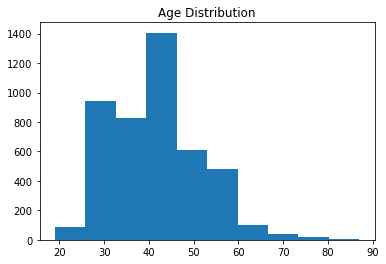

In [124]:
plt.hist(df["age"])
plt.title("Age Distribution")
plt.show()

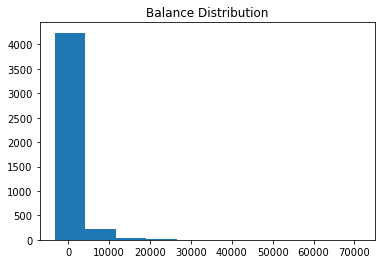

In [125]:
plt.hist(df["balance"])
plt.title("Balance Distribution")
plt.show()

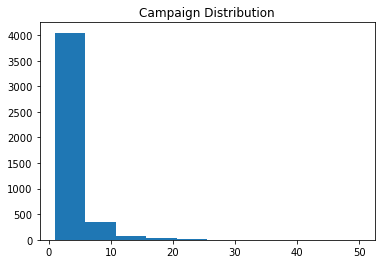

In [131]:
plt.hist(df["campaign"])
plt.title("Campaign Distribution")
plt.show()

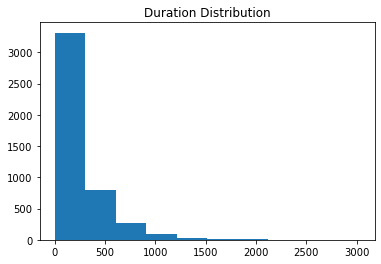

In [126]:
plt.hist(df["duration"])
plt.title("Duration Distribution")
plt.show()

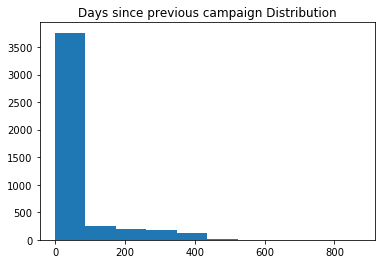

In [132]:
plt.hist(df["pdays"])
plt.title("Days since previous campaign Distribution")
plt.show()

### Part 8.2

Now for the rest of the assignment, we remove the categorical columns.

In [128]:
del df_train["job"]
del df_train["marital"]
del df_train["education"]
del df_train["housing"]
del df_train["loan"]
del df_train["poutcome"]

In [133]:
df_train.head()

,age,balance,duration,campaign,pdays,y
0,30.00000,1787.00000,79.00000,1,-1,0
1,33.00000,4789.00000,264.72402,1,339,0
2,41.61747,135.00000,185.00000,1,330,0
3,30.00000,1476.00000,199.00000,4,-1,0
4,59.00000,1136.75024,226.00000,1,-1,0


## Part 9

Here we normalize the data by replacing $x$ with $ (x-\mu)/\sigma $ where $\mu$ is the mean of the particular column and $\sigma$ is the standard deviation.

In [135]:
def normalize_column(df,column_name):
    mean_ = df[column_name].mean()
    std_ = df[column_name].std()
    df[column_name] = (df[column_name] - mean_)/std_
    return df

In [143]:
df_train_normal=df_train.copy()
for columns_name in ['age', 'balance', 'duration', 'campaign', 'pdays']:
    df_train_normal=normalize_column(df_train_normal,columns_name)

## Part 10

To realize which parameter is good for the classification, we use the probability density function (PDF) of the normal distribution for the mean and standard deviation of each feature for both negative and positive targets.

In [147]:
negative_columns_mean=df_train_normal[df_train_normal["y"]==0].mean()
negative_columns_std=df_train_normal[df_train_normal["y"]==0].std()

positive_columns_mean=df_train_normal[df_train_normal["y"]==1].mean()
positive_columns_std=df_train_normal[df_train_normal["y"]==1].std()

We define a function to plot the PDF of normal distribution for negative and positive samples.

In [191]:
def plot_neg_pos_dist(column_no):
    x=df_train_normal[df_train_normal.columns[column_no]].to_numpy()
    negative_dist=norm.pdf(x,negative_columns_mean[column_no],negative_columns_std[column_no])
    positive_dist=norm.pdf(x,positive_columns_mean[column_no],positive_columns_std[column_no])
    plt.plot(x,negative_dist,'.')
    plt.plot(x,positive_dist,'.')
    plt.title(df_train_normal.columns[column_no])
    plt.show()

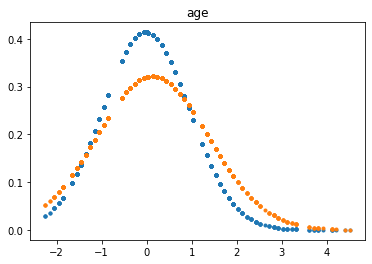

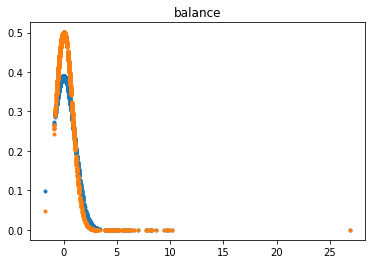

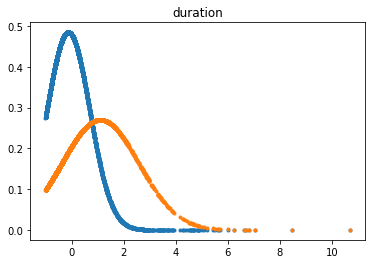

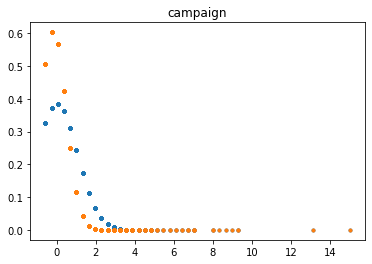

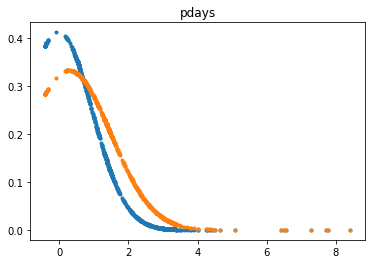

In [192]:
for i in range(len(df_train_normal.columns)-1):
    plot_neg_pos_dist(i)

As it can be inferred from the distribution of features, only the duration of the last call of the customer with the bank has a meaningful relationship with the positive and negative target. Therefore, we will use this feature for classification.